<a href="https://colab.research.google.com/github/atulpatil2228/Pw_ML_learning/blob/main/6_Support_Vector_Classifier_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [3]:
pd.DataFrame(X)

,0,1
0,1.254539,0.691269
1,2.560779,1.261513
2,-0.207514,-0.202617
3,-0.458516,-1.327179
4,-1.686326,1.613331
...,...,...
995,1.636397,-1.685984
996,-1.434174,1.121406
997,0.213280,0.836727
998,-0.624499,2.265472


In [4]:
pd.DataFrame(X)[0]

,0
0,1.254539
1,2.560779
2,-0.207514
3,-0.458516
4,-1.686326
...,...
995,1.636397
996,-1.434174
997,0.213280
998,-0.624499


In [5]:
pd.DataFrame(X)[1]

,1
0,0.691269
1,1.261513
2,-0.202617
3,-1.327179
4,1.613331
...,...
995,-1.685984
996,1.121406
997,0.836727
998,2.265472


<Axes: xlabel='0', ylabel='1'>

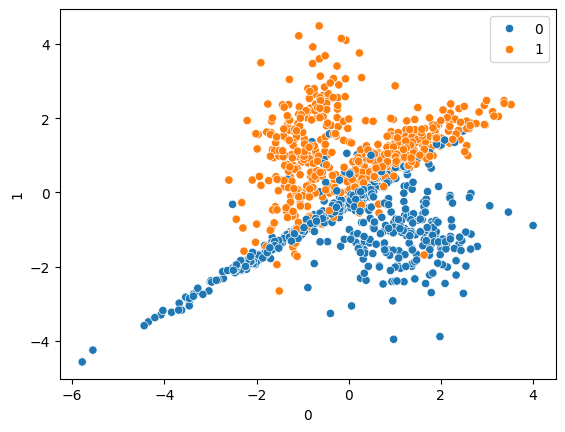

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [8]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')

In [10]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
classifier.coef_

array([[-1.20550313,  2.53187272]])

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       161
           1       0.89      0.91      0.90       139

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [15]:
print(confusion_matrix(y_test, y_pred))

[[145  16]
 [ 13 126]]


In [16]:
print(accuracy_score(y_test, y_pred))

0.9033333333333333


In [24]:
# hyperparameter tuning with SVC

from sklearn.model_selection import GridSearchCV
params = {'C':[0,1,3,4,19,50,78,100],
         'gamma':[1,0.1,0.2,0.001,0.003],
         'kernel':['linear']}

In [27]:
grid = GridSearchCV(SVC(),param_grid=params,cv= 5,verbose = 2)


In [28]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ........................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=0, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=0, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......................C=0, gamma=0.2, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 1, 3, 4, 19, 50, 78, 100],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=2)

In [29]:
grid.best_params_

{'C': 3, 'gamma': 1, 'kernel': 'linear'}

In [30]:
grid.best_score_

np.float64(0.9142857142857143)

In [32]:
y_pred = grid.predict(X_test)

In [33]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       161
           1       0.89      0.91      0.90       139

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [35]:
print(accuracy_score(y_test, y_pred))

0.9033333333333333
